<a href="https://colab.research.google.com/github/kamalmukhalalaty/Data-Analytics/blob/main/PCA_Score_Loading_Plots_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# 1 Chemical composition of pottery 
You work for a pottery manufacturing company that produces two different types of products A and B. Product A uses raw material from Llanedyrn and Product B uses raw material from Isle Thorns and Ashley Rails1. Your company is informed that Llanedyrn will be closing soon for maintenance and your entire production of product A is at risk. 

You received a potential new source of raw material from site Caldicot and you analyzed two samples to compare them to your existing samples from the other three sites. As the new data scientist of the company you are asked to look into the data and give your recommendation regarding the suitability of raw material from Caldicot as a replacement for Llanedyrn. 

The ask ”look into the data” normally calls for an unsupervised learning exercise, since there is no clear output you are asked to predict. You will investigate the multivariate chem ical composition of the raw material from four different sources using Principal Component Analysis. 

##1.1 Data exploration with PCA 
1. Import and view the data. How many columns do you have? Which columns will you use in your PCA? 
2. Pre-process the data and perform PCA with 3 PCs. 
3. Plot the cumulative explained variance graph. What percent of the variance do the first 2 and 3 components describe? 
4. Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a differ ent colour or symbol. 
5. How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B? 

> 1) These are sites in Great Britain (or Game of Thrones if you prefer). The data come from ancient pottery findings and the problem is fictitious. 

6. Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why? 

7. What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples? 

8. Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below. 

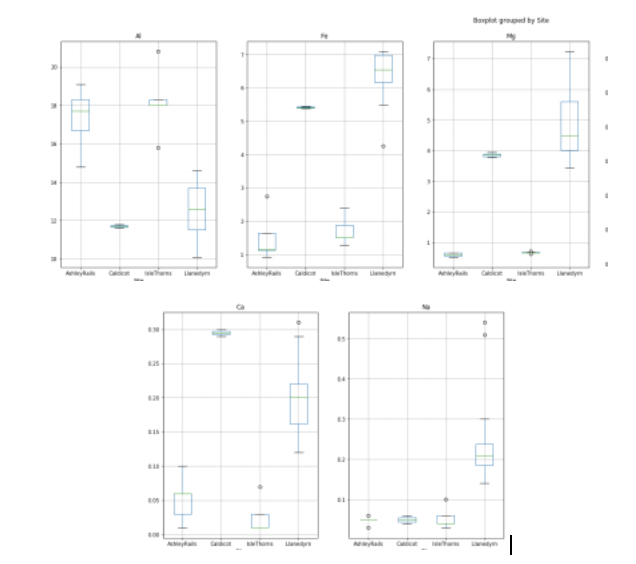

Final note: In this problem, we reduced the number of variables from 5 to 2 in order to visualize the characteristics captured in the 5 variables. With more than 5 variables you realize that it becomes difficult to visualize and compare the different samples. Dimension reduction methods like PCA are crucial to understand multivariate data. Conventional statistical analysis like the boxplot shown here do not show the correlations between the variables which are simply captured in the PCA plots you created. 



### 1 Import and view the data. How many columns do you have? Which columns will you use in your PCA?

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df=pd.read_csv('Pottery.csv')

In [ ]:
df

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [ ]:
# How many columns do you have? Which columns will you use in your PCA?

print("Number of cols:",df.shape[1])
print("cols needed for PCA:\n",df.loc[:,'Al':])

Number of cols: 7
cols needed for PCA:
       Al    Fe    Mg    Ca    Na
0   14.4  7.00  4.30  0.15  0.51
1   13.8  7.08  3.43  0.12  0.17
2   14.6  7.09  3.88  0.13  0.20
3   11.5  6.37  5.64  0.16  0.14
4   13.8  7.06  5.34  0.20  0.20
5   10.9  6.26  3.47  0.17  0.22
6   10.1  4.26  4.26  0.20  0.18
7   11.6  5.78  5.91  0.18  0.16
8   11.1  5.49  4.52  0.29  0.30
9   13.4  6.92  7.23  0.28  0.20
10  12.4  6.13  5.69  0.22  0.54
11  13.1  6.64  5.51  0.31  0.24
12  12.7  6.69  4.45  0.20  0.22
13  12.5  6.44  3.94  0.22  0.23
14  11.8  5.44  3.94  0.30  0.04
15  11.6  5.39  3.77  0.29  0.06
16  18.3  1.28  0.67  0.03  0.03
17  15.8  2.39  0.63  0.01  0.04
18  18.0  1.50  0.67  0.01  0.06
19  18.0  1.88  0.68  0.01  0.04
20  20.8  1.51  0.72  0.07  0.10
21  17.7  1.12  0.56  0.06  0.06
22  18.3  1.14  0.67  0.06  0.05
23  16.7  0.92  0.53  0.01  0.05
24  14.8  2.74  0.67  0.03  0.05
25  19.1  1.64  0.60  0.10  0.03


### 2 Pre-process the data and perform PCA with 3 PCs.

In [ ]:
# drop first two cols
# DROP COLUMNS AND ROWS
dff=df.drop(columns = ['Unnamed: 0', 'Site'])

#### Data exploration and visualization Pre-Standardization

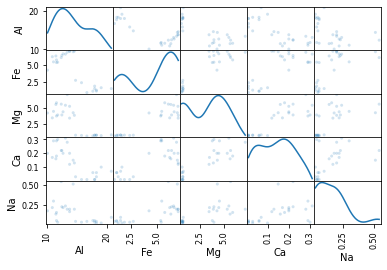

In [ ]:
#from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(dff, alpha=0.2, diagonal = 'kde');

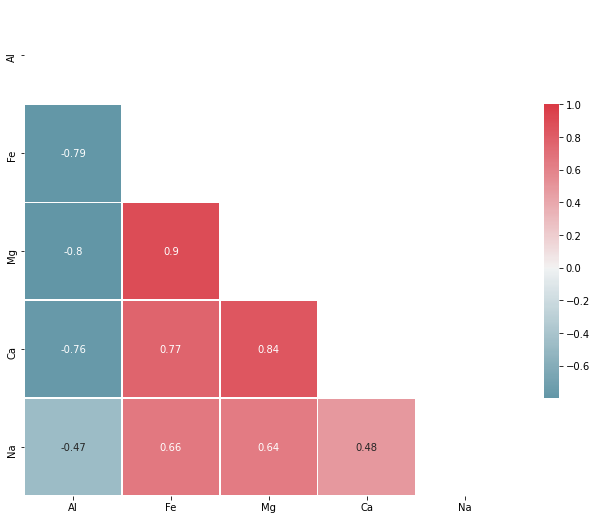

In [ ]:
corr = dff.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True)
plt.show()

Generate Kernel Density Estimate plot using Gaussian kernels.

In statistics, kernel density estimation_ (KDE) is a non-parametric
way to estimate the probability density function (PDF) of a random
variable. This function uses Gaussian kernels and includes automatic
bandwidth determination.

In [ ]:
dff.describe()

,Al,Fe,Mg,Ca,Na
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,14.492308,4.467692,3.141538,0.146538,0.158462
std,2.992647,2.409751,2.179726,0.101230,0.135283
min,10.100000,0.920000,0.530000,0.010000,0.030000
25%,11.950000,1.700000,0.670000,0.060000,0.050000
50%,13.800000,5.465000,3.825000,0.155000,0.150000
75%,17.450000,6.590000,4.502500,0.215000,0.215000
max,20.800000,7.090000,7.230000,0.310000,0.540000


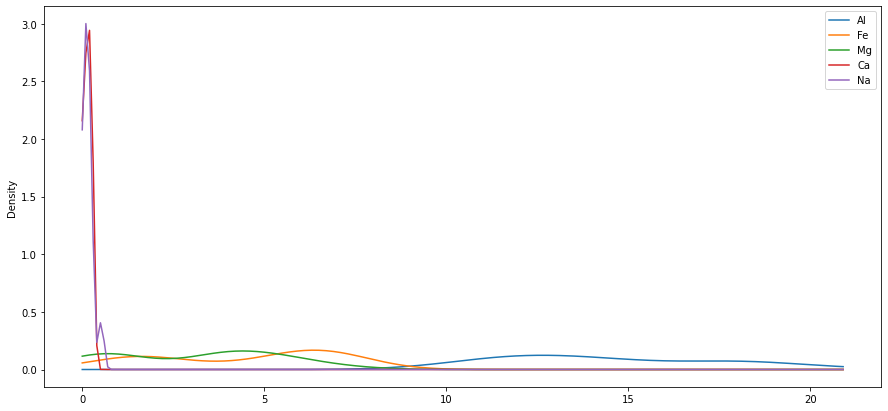

In [ ]:
dff.plot.kde(ind=np.arange(0,21,0.1), figsize=(15,7))

Fe is highly correlated to Mg

Mg highly correlated to Ca

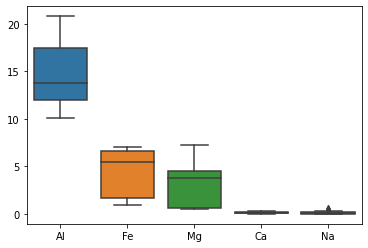

In [ ]:
sns.boxplot(data = dff)

#### Standardizing the data 

I will standardize as that was done in class although we do not need to as PCA is only effected by the variance 

Normalization:
- Not mean centering as technically only need to normalize (get all std=1) for PCA to yeild unbiased results

In [ ]:
# standardize
scaler = StandardScaler(with_mean=True,with_std=True)
# normalize
# scaler = StandardScaler(with_mean=False,with_std=True)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled = scaler.fit_transform(dff)
#scaled

scaled_df = pd.DataFrame(scaled)
scaled_df.columns=dff.columns
scaled_df.index=dff.index
scaled_df.describe()

,Al,Fe,Mg,Ca,Na
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,-5.124106e-17,6.832142e-17,-7.686159e-17,2.989062e-17,1.708035e-17
std,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00
min,-1.496766e+00,-1.501380e+00,-1.221831e+00,-1.375504e+00,-9.683804e-01
25%,-8.663417e-01,-1.171284e+00,-1.156331e+00,-8.717984e-01,-8.176146e-01
50%,-2.359176e-01,4.220595e-01,3.197635e-01,8.524251e-02,-6.378554e-02
75%,1.007892e+00,8.981583e-01,6.367378e-01,6.896894e-01,4.262033e-01
max,2.149471e+00,1.109758e+00,1.912823e+00,1.646730e+00,2.876148e+00


#### Data exploration and visualization Post-Standardization

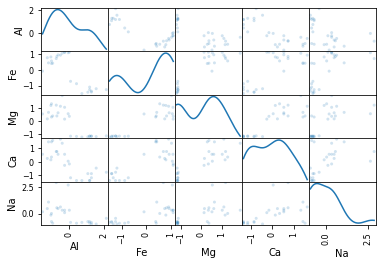

In [ ]:
#from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(scaled_df, alpha=0.2, diagonal = 'kde');

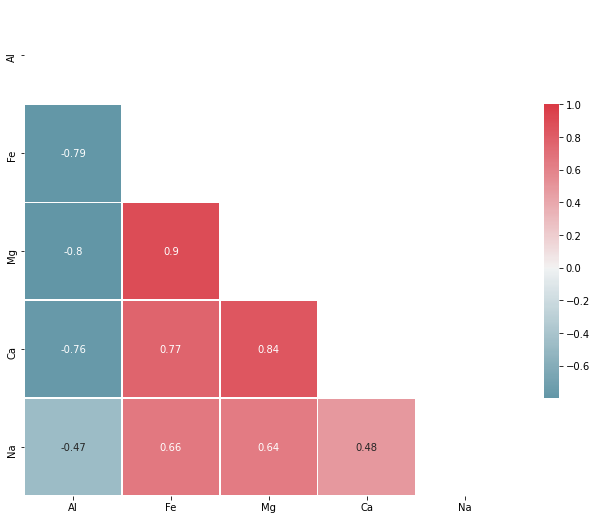

In [ ]:
corr = scaled_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True)
plt.show()

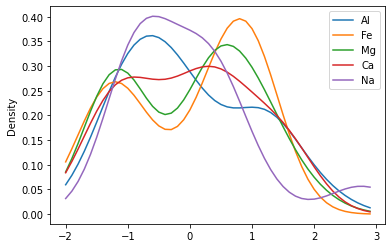

In [ ]:
scaled_df.plot.kde(ind=np.arange(-2,3,0.1))

SPEAK ABOUT HOW STANDARDIZED IS DIFFERENT

- so the correlations stayed the same but the scales are now comparable

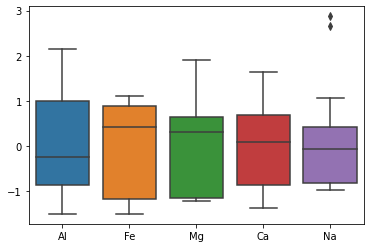

In [ ]:
sns.boxplot(data = scaled_df)

#### Running PCA


In [ ]:
pca = PCA(n_components=3, svd_solver='full') # setting up the PCA object
# applying it to th data
pca_scores = pca.fit_transform(scaled)

In [ ]:
# convert scores to DF and check them out
scores_df = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = dff.index)
scores_df.head()

,PC1,PC2,PC3
0,-1.778026,2.289445,-0.075289
1,-0.611193,0.122065,-0.499044
2,-0.722428,0.370209,-0.207550
3,-1.417696,-0.555600,-0.557590
4,-1.486801,-0.004081,0.195248


In [ ]:
# extract loadings to show the weighting sof the linear combination of features 
# that create each PC

loadings_df = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = dff.columns)
loadings_df

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


### 3 Plot the cumulative explained variance graph. What percent of the variance do the first 2 and 3 components describe?

In [ ]:
# will run PCA for all 5 and use that  just for more illustration

In [ ]:
pca5 = PCA(n_components=5, svd_solver='full')

In [ ]:
pca5.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

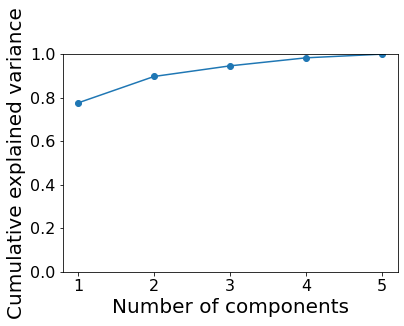

In [ ]:
plt.plot(range(1,pca5.n_components+1), np.cumsum(pca5.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

In [ ]:
print('percent of the variance explained by first 2 PCs', np.cumsum(pca5.explained_variance_ratio_)[1])
print('percent of the variance explained by first 3 PCs', np.cumsum(pca5.explained_variance_ratio_)[2])

percent of the variance explained by first 2 PCs 0.897321366378989
percent of the variance explained by first 3 PCs 0.9461598027980749


as expected we only have 5 columns our data is not spectriscopic and this result shows that we only really need 3 PCs to almost fully describe the data. and even when describing with 2 PCs we are 90% explained.

### 4 Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a differ ent colour or symbol.

#### Plotting Scores

In [ ]:
df.Site.unique()

array(['Llanedyrn', 'Caldicot', 'IsleThorns', 'AshleyRails'], dtype=object)

In [ ]:
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
      if label=='Llanedyrn':
        plt.text(x, y, label, ha='center', size=11, c='r')
      elif label=='Caldicot':
        plt.text(x, y, label, ha='center', size=11, c='g')
      elif label=='IsleThorns':
        plt.text(x, y, label, ha='center', size=11, c='b')
      else:
        plt.text(x, y, label, ha='center', size=11,  c='orange')

    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

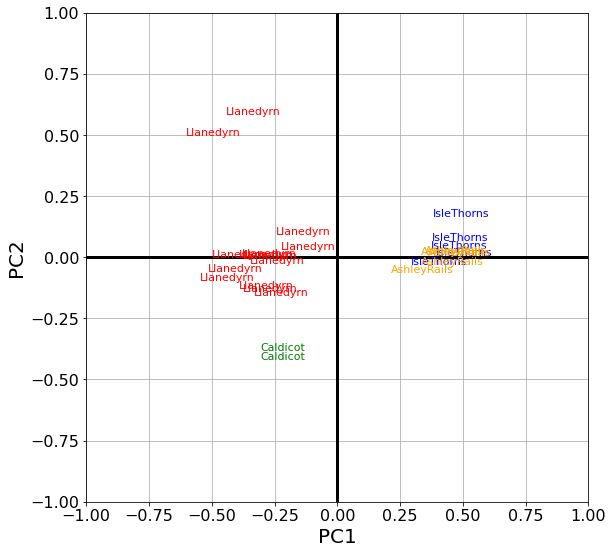

In [ ]:
score_plot(pca_scores[:,:2], score_labels=df.Site)

looks like Ahsley Rails and Isle Thorns have allot in common. 
On the other hand. 

Lianedyrn and Caldicot are not as similar but both lie on the negative side of PC2 while Ahsley Rails and Isle Thorns are both on the positive side of PC2.

#### Plotting Loadings

In [ ]:
def loadings(coeff,loading_labels=None,score_labels=None):  
    scale=1
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*scale, coeff[i,1]*scale,color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*(scale+.1), coeff[i,1]*(scale+.1), loading_labels[i], color = 'r', ha = 'center', va = 'center')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("PC{}".format(1), fontsize=20);
        plt.ylabel("PC{}".format(2), fontsize=20);
        plt.tick_params(labelsize=16)
        plt.grid()

In [ ]:
loadings_df

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


In [ ]:
#loadings_df['PC1'].min()
#loadings_df['PC1'].max()
#loadings_df['PC2'].min()
#loadings_df['PC2'].max()

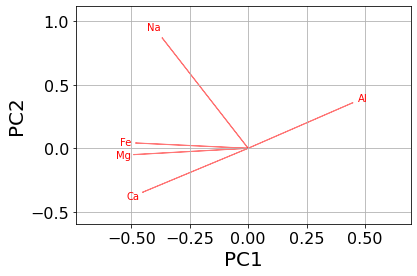

In [ ]:
loadings(np.transpose(pca.components_[0:2, :]),loading_labels=loadings_df.index,score_labels=scores_df.index)
plt.xlim(loadings_df['PC1'].min() -0.25,loadings_df['PC1'].max()+ 0.25)
plt.ylim(loadings_df['PC2'].min()- 0.25,loadings_df['PC2'].max()+ 0.25)
plt.show()

#### Plotting Scores & Loadings

In [ ]:
def myplot(scores,coeff,loading_labels=None,score_labels=None):

    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
      if label=='Llanedyrn':
        plt.text(x, y, label, ha='center', size=11, c='r')
      elif label=='Caldicot':
        plt.text(x, y, label, ha='center', size=11, c='g')
      elif label=='IsleThorns':
        plt.text(x, y, label, ha='center', size=11, c='b')
      else:
        plt.text(x, y, label, ha='center', size=11,  c='orange')

    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)

    scale=1
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*scale, coeff[i,1]*scale,alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*(scale+.1), coeff[i,1]*(scale+.1), loading_labels[i], ha = 'center', va = 'center')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("PC{}".format(1), fontsize=20);
        plt.ylabel("PC{}".format(2), fontsize=20);
        plt.tick_params(labelsize=16)
        plt.grid()

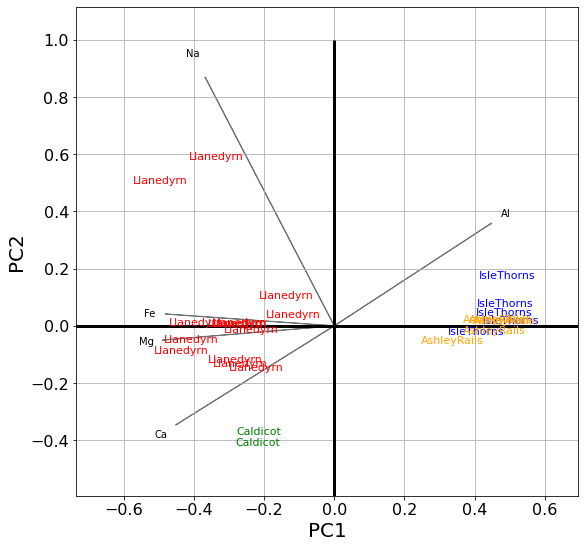

In [ ]:
#score,coeff,loading_labels=None,score_labels=None):
myplot(pca_scores[:,:2], np.transpose(pca.components_[0:2, :]), loading_labels=loadings_df.index, score_labels=df.Site)

#def loadings(coeff,loading_labels=None,score_labels=None):  
#loadings(np.transpose(pca.components_[0:2, :]),loading_labels=loadings_df.index,score_labels=scores_df.index)

plt.xlim(loadings_df['PC1'].min() -0.25,loadings_df['PC1'].max()+ 0.25)
plt.ylim(loadings_df['PC2'].min()- 0.25,loadings_df['PC2'].max()+ 0.25)
plt.show()

### 5. How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?

looks like Ahsley Rails and Isle Thorns have allot in common. On the other hand.
both in the positive PC2 region, have high concentrations of Al, have low concentrations of Na, Fe, Mg, Ca and are very close to one another!

Lianedyrn and Caldicot are not as similar but both lie on the negative side of PC2 while Ahsley Rails and Isle Thorns are both on the positive side of PC2.

There are clear set of two outliers for Llanedyrn with very high concentrations of Na. 

Llanedyrn material seems to have high variation.

### 6 Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?

where the caldicot material really stands our is its bellow average concentrations of Na when compared to the concentrations of Na in Llanedyrn. 

If this lower concentration of Na is acceptable then Caldicot seems like an ideal replacement

### 7 What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?

The biggest difference:
Lianedyrn and Caldicot are not as similar as Ahsley Rails and Isle Thorns but both lie on the negative side of PC2 while Ahsley Rails and Isle Thorns are both on the positive side of PC2.

The majority of Lianedyrn produced materials have average to above average cobcentrations of Fe, Mg, Na, Ca and below average concentrations of Al.

however there apears to be two outliers with above average concentrations of Na.


The two Caldicot samples are almost Identical in terms of composition as explained by the first two PCs. they resemble samples from Lianedyrn as they have average to above average cobcentrations of Fe, Mg, Ca and below average concentrations of Al. 

If we treat the suspected outliers (with above average concentrations of Na) from Lianedyrn as valid data points. Then the Caldicot samples differ from Lianedyrn in having bellow average concentrations of Na. 

### 8 Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below.

#### Unscaled

In [ ]:
dfff=df.drop(columns='Unnamed: 0')
type(dfff)
dfff

,Site,Al,Fe,Mg,Ca,Na
0,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [ ]:
dfff.Site.value_counts()

Llanedyrn      14
AshleyRails     5
IsleThorns      5
Caldicot        2
Name: Site, dtype: int64

In [ ]:
df1 = dfff[dfff.Site=='Llanedyrn']
df2 = dfff[dfff.Site=='AshleyRails']
df3 = dfff[dfff.Site=='IsleThorns']
df4 = dfff[dfff.Site=='Caldicot']

In [ ]:
df1

,Site,Al,Fe,Mg,Ca,Na
0,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,Llanedyrn,13.4,6.92,7.23,0.28,0.20


           Site Chemical  value
0     Llanedyrn       Al  14.40
1     Llanedyrn       Al  13.80
2     Llanedyrn       Al  14.60
3     Llanedyrn       Al  11.50
4     Llanedyrn       Al  13.80
..          ...      ...    ...
125  IsleThorns       Na   0.06
126  IsleThorns       Na   0.04
127  IsleThorns       Na   0.10
128    Caldicot       Na   0.04
129    Caldicot       Na   0.06

[130 rows x 3 columns]


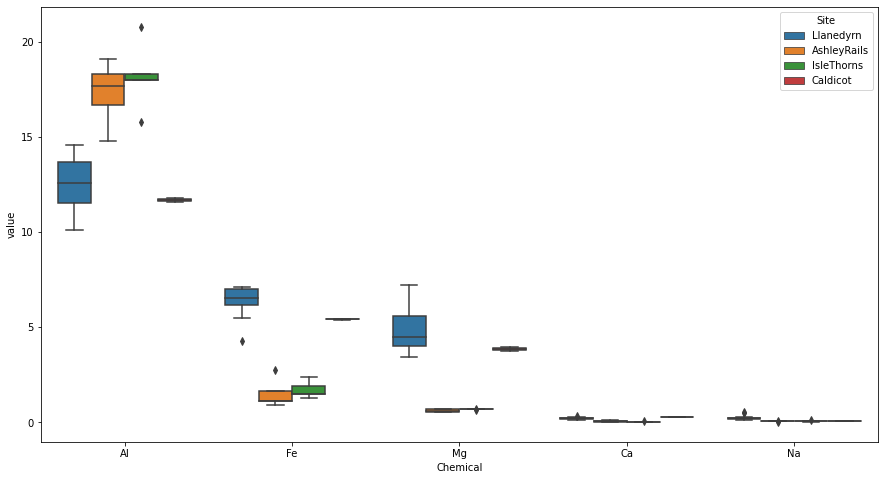

In [ ]:
cdf = pd.concat([df1, df2, df3, df4])                            # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Site'], var_name=['Chemical'])      # MELT
print(mdf)

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Chemical", y="value", hue="Site", data=mdf)  # RUN PLOT   
plt.show()

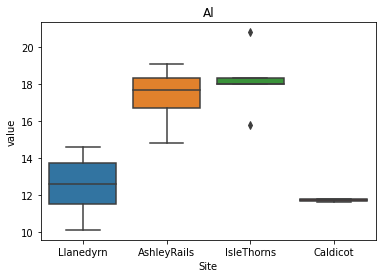

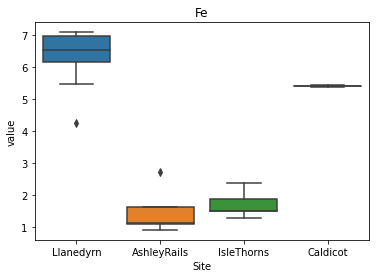

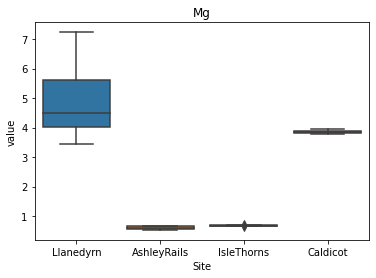

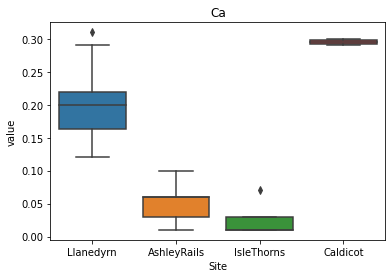

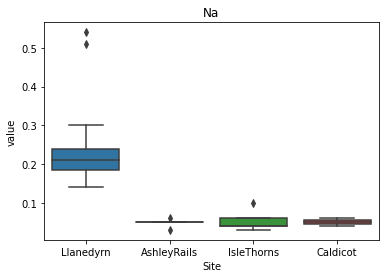

In [ ]:
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Al'])  # RUN PLOT
plt.title('Al')   
plt.show()
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Fe'])  # RUN PLOT
plt.title('Fe')   
plt.show()
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Mg'])  # RUN PLOT
plt.title('Mg')   
plt.show()
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Ca'])  # RUN PLOT
plt.title('Ca')   
plt.show()
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Na'])  # RUN PLOT
plt.title('Na')   
plt.show()

#### Scaled

In [ ]:
dfff=pd.concat([df['Site'],scaled_df], axis=1)
dfff=dfff
type(dfff)
dfff

,Site,Al,Fe,Mg,Ca,Na
0,Llanedyrn,-0.031456,1.071670,0.541996,0.034872,2.649999
1,Llanedyrn,-0.235918,1.105526,0.134959,-0.267352,0.086980
2,Llanedyrn,0.036698,1.109758,0.345496,-0.166610,0.313129
3,Llanedyrn,-1.019688,0.805055,1.168927,0.135613,-0.139168
4,Llanedyrn,-0.235918,1.097062,1.028569,0.538578,0.313129
5,Llanedyrn,-1.224150,0.758503,0.153674,0.236354,0.463895
6,Llanedyrn,-1.496766,-0.087895,0.523282,0.538578,0.162363
7,Llanedyrn,-0.985611,0.555367,1.295249,0.337095,0.011597
8,Llanedyrn,-1.155996,0.432640,0.644925,1.445248,1.066958
9,Llanedyrn,-0.372225,1.037814,1.912823,1.344507,0.313129


In [ ]:
dfff.Site.value_counts()

Llanedyrn      14
AshleyRails     5
IsleThorns      5
Caldicot        2
Name: Site, dtype: int64

In [ ]:
df1 = dfff[dfff.Site=='Llanedyrn']
df2 = dfff[dfff.Site=='AshleyRails']
df3 = dfff[dfff.Site=='IsleThorns']
df4 = dfff[dfff.Site=='Caldicot']

In [ ]:
df1

,Site,Al,Fe,Mg,Ca,Na
0,Llanedyrn,-0.031456,1.071670,0.541996,0.034872,2.649999
1,Llanedyrn,-0.235918,1.105526,0.134959,-0.267352,0.086980
2,Llanedyrn,0.036698,1.109758,0.345496,-0.166610,0.313129
3,Llanedyrn,-1.019688,0.805055,1.168927,0.135613,-0.139168
4,Llanedyrn,-0.235918,1.097062,1.028569,0.538578,0.313129
5,Llanedyrn,-1.224150,0.758503,0.153674,0.236354,0.463895
6,Llanedyrn,-1.496766,-0.087895,0.523282,0.538578,0.162363
7,Llanedyrn,-0.985611,0.555367,1.295249,0.337095,0.011597
8,Llanedyrn,-1.155996,0.432640,0.644925,1.445248,1.066958
9,Llanedyrn,-0.372225,1.037814,1.912823,1.344507,0.313129


           Site Chemical     value
0     Llanedyrn       Al -0.031456
1     Llanedyrn       Al -0.235918
2     Llanedyrn       Al  0.036698
3     Llanedyrn       Al -1.019688
4     Llanedyrn       Al -0.235918
..          ...      ...       ...
125  IsleThorns       Na -0.742232
126  IsleThorns       Na -0.892997
127  IsleThorns       Na -0.440700
128    Caldicot       Na -0.892997
129    Caldicot       Na -0.742232

[130 rows x 3 columns]


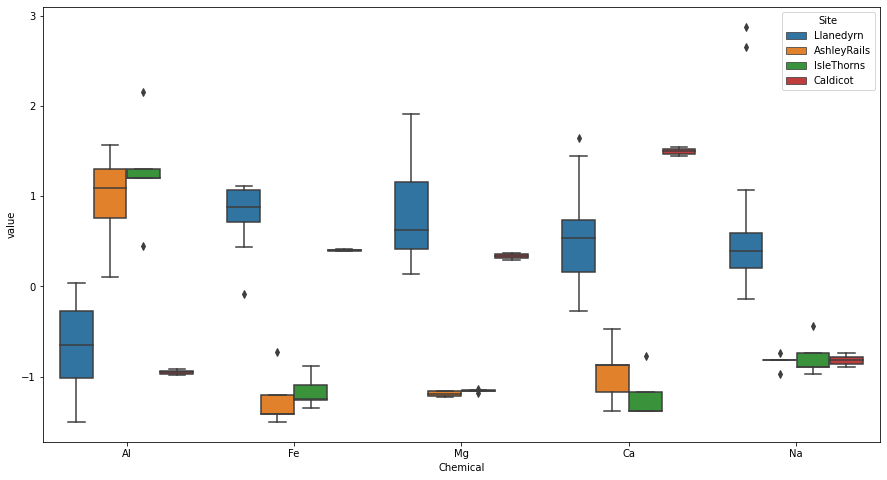

In [ ]:
cdf = pd.concat([df1, df2, df3, df4])                            # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Site'], var_name=['Chemical'])      # MELT
print(mdf)

plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Chemical", y="value", hue="Site", data=mdf)  # RUN PLOT   
plt.show()

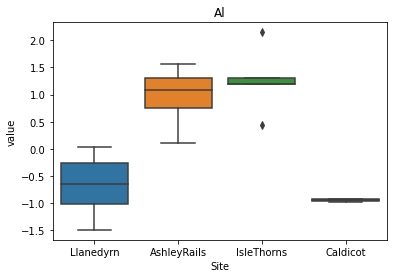

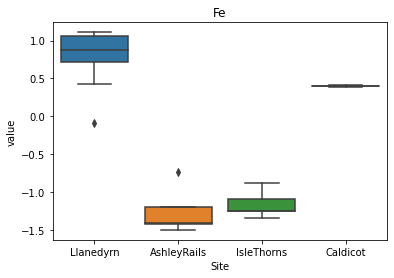

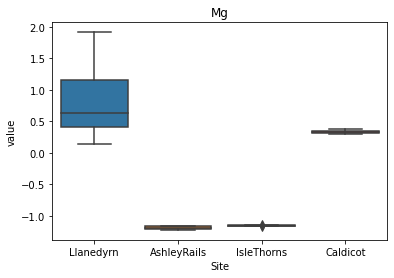

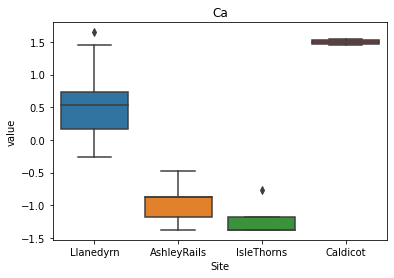

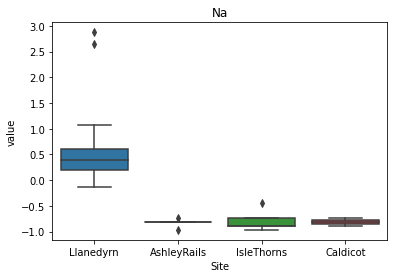

In [ ]:
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Al'])  # RUN PLOT
plt.title('Al')   
plt.show()
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Fe'])  # RUN PLOT
plt.title('Fe')   
plt.show()
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Mg'])  # RUN PLOT
plt.title('Mg')   
plt.show()
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Ca'])  # RUN PLOT
plt.title('Ca')   
plt.show()
ax = sns.boxplot(x="Site", y="value", data=mdf[mdf.Chemical=='Na'])  # RUN PLOT
plt.title('Na')   
plt.show()

As expected the cladicot bar appears to lie within the Llanedyrn 1.5x outlier range for all chemicals except Na

# 2 Batch data analysis 

In this problem, we will look into batch data; dynamic time-series of a finite duration (2). Batch manufacturing processes are very common in chemical, pharma, bioengineering and semi conductor industries such as baker’s yeast production, beer brewing and vaccines production. 

> (2) The data are taken from Chapter 16 of Multi- and Megavariate Data Analysis from Umetrics Academy. The problem in this assignment though is reformulated and is not the same as the one described in the book. 

In theory, a reactor is designed with temperature, pressure, level, pH control and multiple sensors that measure these variables among others. A perfect batch (again in theory) is one that is tightly controlled to the specifications and as a result the productivity and quality of the final product is optimized. 

In real life, a typical batch is run from a few hours up to a week or two and a lot of things can go wrong during this period. There is always variability either because the process is very sensitive to minor fluctuations in some variables or the control of some variables failed for a period of time. 

In a company that implements Data Analytics or Multivariate Statistical Process Control (MSPC) monitoring is typically implemented with the following steps: 

1. Identify a number of reference, perfect historical batches (15-20), both in terms of high productivity/quality and minimum anomalies or fluctuations around the setpoints. 

2. Create a PCA model of the perfect batches identified. This is your model. 

3. Every time your site is running a new batch, fit your data online or as soon as your data infrastructure allows you to do so. Fitting will tell you whether your batch is similar to the perfect batches or it is deviating from the reference behaviour. 

Next, you will follow these steps to build a Batch Statistical Process Control and implement it to monitor a new batch (we will assume that you got the data at the end of the batch and fit them to the model). The dataset is from a baker’s yeast production facility in Solna, Sweden capturing the last step of the fermentation. 




##2.1 Build a Batch Statistical Process Control model 

1. Import the data from ’bakers yeast reference batches.xlsx’. Identify how many batches are in the data. What is the duration of each batch and how many data points are there per batch? How many variables are measured (including time)? 
2. Plot the variables time-profiles in a 2x4 subplot. Inspect the graphs (don’t just plot them). Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled? 
3. Select the features (including the Time column), pre-process the data and perform PCA with 5 principal components. Extract the scores and loadings. 
4. In order to plot the scores-loading plot, you need to pivot the scores BatchID with index ’Time’ (use pandas pivot table). 
5. Plot the scores-loadings plot with one line per batch (this is why the pivot in the previous step was needed). The output should look similar to the plot below. You may choose a different scaling, but the trend should be the same as this graph. 

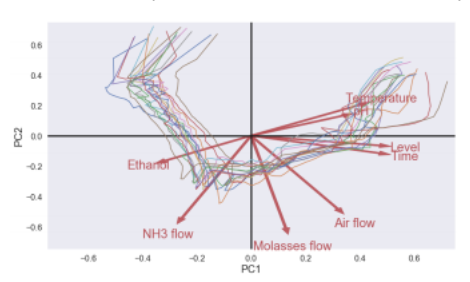

6. Explain this graph. In which quarter do the batches start and end? What happens at the kink where the direction of the lines changes? Can you tell from this graph which variables do not change in the first phase and which in the second phase? 
7. Plot the cumulative explained variance. How much variance do the first two principal components capture? 

### 1 Import the data from ’bakers yeast reference batches.xlsx’. Identify how many batches are in the data. What is the duration of each batch and how many data points are there per batch? How many variables are measured (including time)?

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df=pd.read_excel('bakers_yeast_reference_batches.xlsx')
df

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


number of batches in the data 16
number of datapoints per batch: lb    83
eb    83
Ta    83
fb    83
db    83
ib    83
Ma    83
Va    83
bb    83
Na    83
jb    83
gb    83
Xa    83
hb    83
kb    83
cb    83
Name: BatchID, dtype: int64
number of unique time intervals: 7.33333     16
10.00000    16
11.00000    16
11.50000    16
12.00000    16
            ..
13.66670    16
2.83333     16
9.83333     16
7.66667     16
0.00000     16
Name: Time, Length: 83, dtype: int64
Unique time intervals: [ 0.        0.166667  0.333333  0.5       0.666667  0.833333  1.
  1.16667   1.33333   1.5       1.66667   1.83333   2.        2.16667
  2.33333   2.5       2.66667   2.83333   3.        3.16667   3.33333
  3.5       3.66667   3.83333   4.        4.16667   4.33333   4.5
  4.66667   4.83333   5.        5.16667   5.33333   5.5       5.66667
  5.83333   6.        6.16667   6.33333   6.5       6.66667   6.83333
  7.        7.16667   7.33333   7.5       7.66667   7.83333   8.
  8.16667   8.33333   8.5    

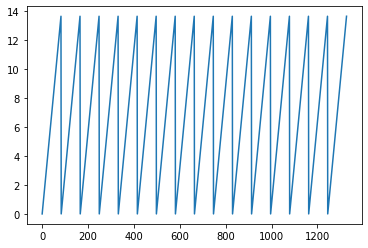

In [ ]:
#Identify how many batches are in the data
#What is the duration of each batch and how many data points are there per batch? 
#how many datapoints per batch
print('number of batches in the data', len(df.BatchID.unique()))
print('number of datapoints per batch:', df.BatchID.value_counts())
print('number of unique time intervals:', df.Time.value_counts())
print('Unique time intervals:', df.Time.unique())
plt.plot(df.Time)

### 2 Plot the variables time-profiles in a 2x4 subplot. Inspect the graphs (don’t just plot them). Look for potential outliers. Which variables have the largest variability? Which variables are tightly controlled?

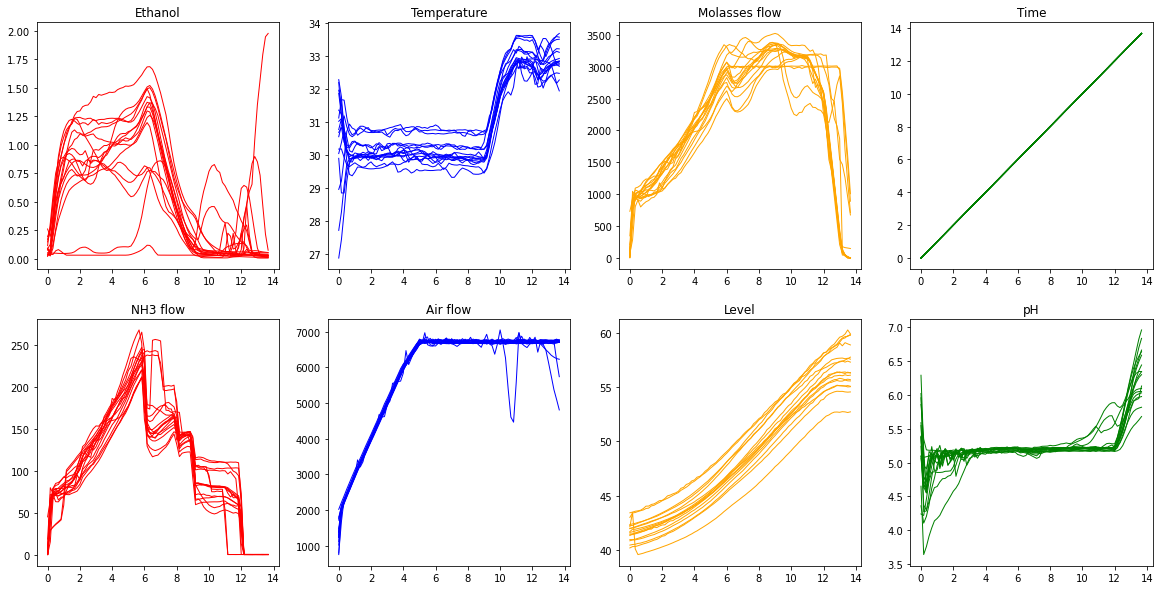

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, axes  = plt.subplots(nrows=2, ncols=4, sharex=False, sharey=False, figsize=(20,10))

plt.figure(figsize=(10,10))
x=df.Time.unique()

for i in range(len(df.BatchID.unique())):
  axes[0,0].plot(x, df[df.BatchID==df.BatchID.unique()[i]].Ethanol, color="red", linewidth=1.0, linestyle="-")
  axes[0,0].set_title('Ethanol')

  axes[0,1].plot(x, df[df.BatchID==df.BatchID.unique()[i]].Temperature, color="blue", linewidth=1.0, linestyle="-")
  axes[0,1].set_title('Temperature')

  axes[0,2].plot(x, df[df.BatchID==df.BatchID.unique()[i]]['Molasses flow'], color="orange", linewidth=1.0, linestyle="-")
  axes[0,2].set_title('Molasses flow')

  axes[0,3].plot(x, df[df.BatchID==df.BatchID.unique()[i]]['Time'], color="green", linewidth=1.0, linestyle="-")
  axes[0,3].set_title('Time')

  axes[1,0].plot(x, df[df.BatchID==df.BatchID.unique()[i]]['NH3 flow'], color="red", linewidth=1.0, linestyle="-")
  axes[1,0].set_title('NH3 flow')

  axes[1,1].plot(x, df[df.BatchID==df.BatchID.unique()[i]]['Air flow'], color="blue", linewidth=1.0, linestyle="-")
  axes[1,1].set_title('Air flow')

  axes[1,2].plot(x, df[df.BatchID==df.BatchID.unique()[i]]['Level'], color="orange", linewidth=1.0, linestyle="-")
  axes[1,2].set_title('Level')

  axes[1,3].plot(x, df[df.BatchID==df.BatchID.unique()[i]]['pH'], color="green", linewidth=1.0, linestyle="-")
  axes[1,3].set_title('pH')

plt.subplots_adjust(wspace=5,hspace=5)
plt.show()


ethanol, molases flow and temperature and ph have high variablility 

airflow has some clear outliers but just a few

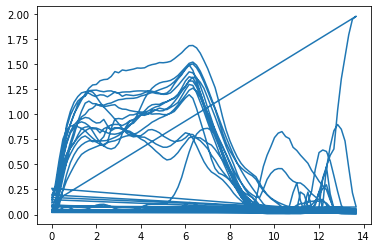

In [ ]:
plt.plot(df.Time,df.Ethanol) # need to split based on time

### 3 Select the features (including the Time column), pre-process the data and perform PCA with 5 principal components. Extract the scores and loadings.

In [ ]:
dff=df.loc[:,'Time':]
dff

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...
1323,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


In [ ]:
dff.describe()

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,6.833334,0.546259,30.904465,2214.475766,110.074446,5850.241837,48.574414,5.240005
std,3.994554,0.476731,1.245815,944.410350,65.035411,1438.018429,5.336438,0.324042
min,0.000000,0.006430,26.889900,-1.032990,-0.010680,750.288000,39.573700,3.642690
25%,3.333330,0.057715,29.955900,1438.555000,71.246225,5333.025000,43.717900,5.161107
50%,6.833330,0.485180,30.306300,2473.810000,110.972000,6680.740000,47.881200,5.193020
75%,10.333300,0.947990,32.202925,3008.962500,153.631250,6731.400000,53.238425,5.217735
max,13.666700,1.975210,33.673200,3520.810000,267.538000,7050.520000,60.257400,6.955070


#### Data exploration and visualization Pre-Standardization

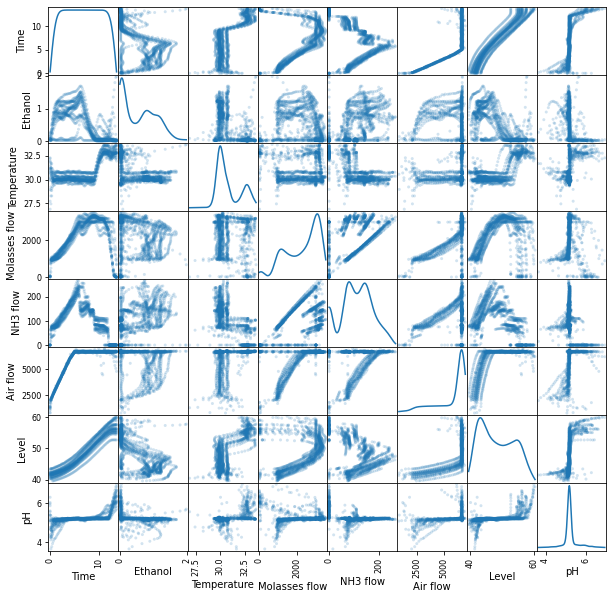

In [ ]:
#from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(dff, alpha=0.2, diagonal = 'kde',figsize=(10,10));

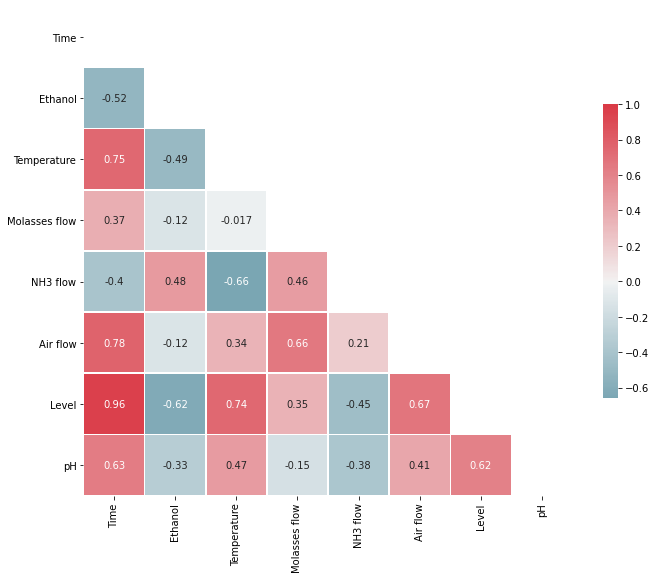

In [ ]:
corr = dff.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True)
plt.show()

level, airflow, temperature are all highly correlated with time.

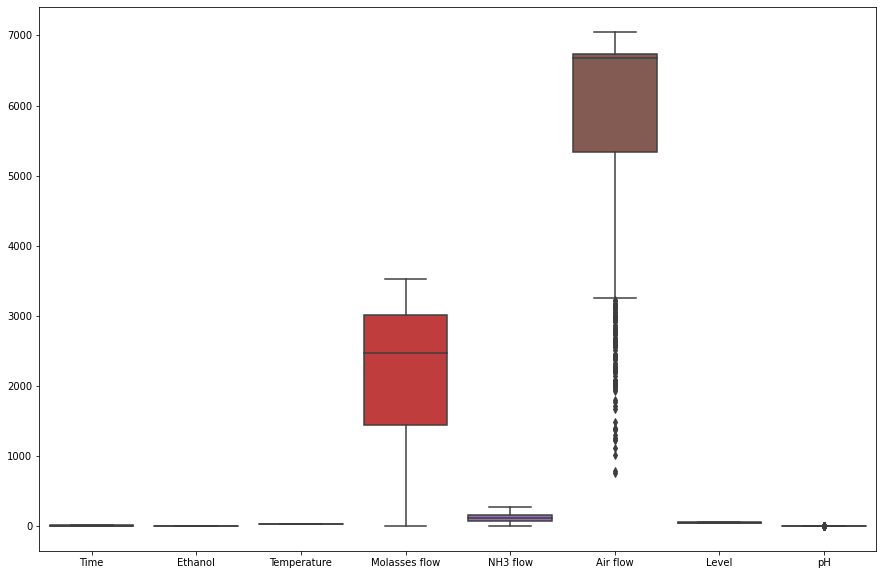

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data = dff)

Really need to standardize the data the scales are soo different

Airflow apears to have allot of outliers

#### Standardizing the data 

I will standardize as that was done in class although we do not need to as PCA is only effected by the variance 

Normalization:
- Not mean centering as technically only need to normalize (get all std=1) for PCA to yeild unbiased results

In [ ]:
# standardize
scaler = StandardScaler(with_mean=True,with_std=True)
# normalize
# scaler = StandardScaler(with_mean=False,with_std=True)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled = scaler.fit_transform(dff)
#scaled

scaled_df = pd.DataFrame(scaled)
scaled_df.columns=dff.columns
scaled_df.index=dff.index
scaled_df.describe()

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
count,1.328000e+03,1.328000e+03,1.328000e+03,1.328000e+03,1.328000e+03,1.328000e+03,1.328000e+03,1.328000e+03
mean,8.945321e-17,4.765264e-17,1.015252e-15,-2.742117e-17,-1.021606e-16,1.384853e-16,7.064296e-16,1.371727e-15
std,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00,1.000377e+00
min,-1.711307e+00,-1.132784e+00,-3.223654e+00,-2.346801e+00,-1.693333e+00,-3.547851e+00,-1.687287e+00,-4.931195e+00
25%,-8.765239e-01,-1.025167e+00,-7.616878e-01,-8.219023e-01,-5.972569e-01,-3.598088e-01,-9.104095e-01,-2.435695e-01
50%,-9.353601e-07,-1.281698e-01,-4.803203e-01,2.747025e-01,1.380621e-02,5.777471e-01,-1.299510e-01,-1.450499e-01
75%,8.765145e-01,8.429956e-01,1.042650e+00,8.415685e-01,6.699921e-01,6.129894e-01,8.743225e-01,-6.875030e-02
max,1.711315e+00,2.998525e+00,2.223265e+00,1.383748e+00,2.422109e+00,8.349895e-01,2.190110e+00,5.294713e+00


#### Data exploration and visualization Post-Standardization

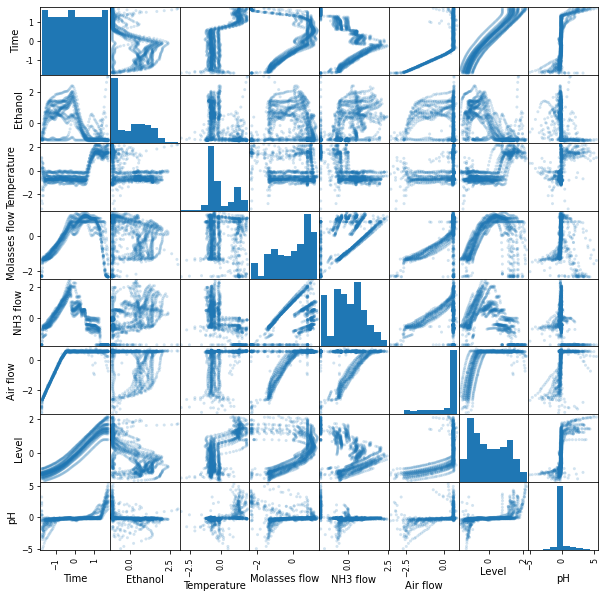

In [ ]:
#from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(scaled_df, alpha=0.2,figsize=(10,10));

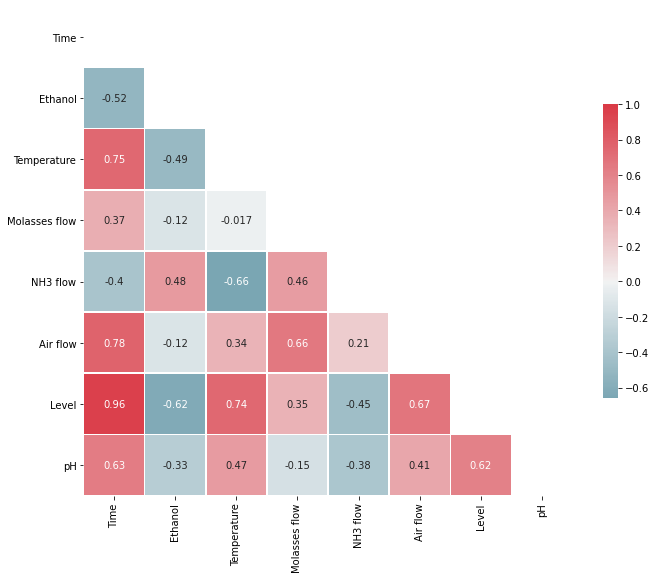

In [ ]:
corr = scaled_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True)
plt.show()

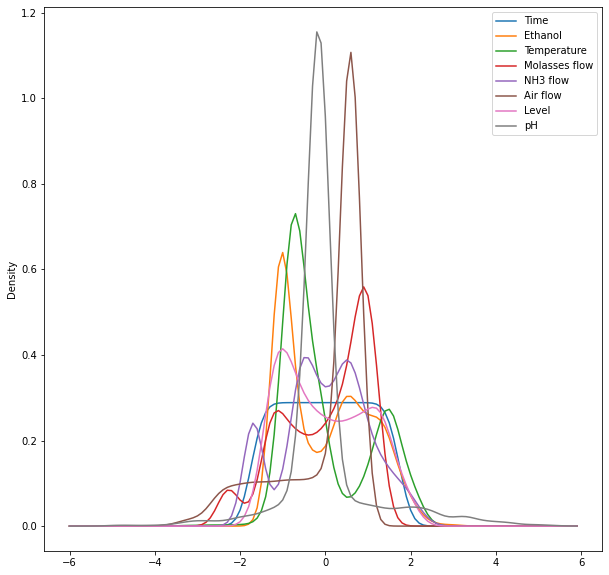

In [ ]:
scaled_df.plot.kde(ind=np.arange(-6,6,0.1), figsize=(10,10))

SPEAK ABOUT HOW STANDARDIZED IS DIFFERENT

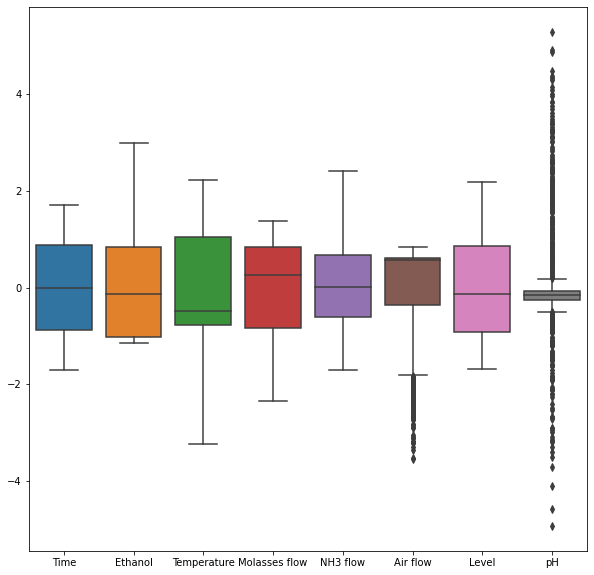

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = scaled_df)

looks like we have allot of outliers on pH and Air Flow and those are more extreme then the visually confirmed outliers on ethanol

#### Running PCA


In [ ]:
pca = PCA(n_components=5, svd_solver='full') # setting up the PCA object
# applying it to th data
pca_scores = pca.fit_transform(scaled)

In [ ]:
# convert scores to DF and check them out
scores_df = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                         ,index = dff.index)
scores_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.808176,4.508288,-0.200368,1.295502,-0.754945
1,-1.303347,3.391210,0.824346,0.666865,-0.552935
2,-1.630004,3.073121,1.085677,0.706676,-0.168488
3,-1.790453,2.816650,1.059588,0.979711,0.160562
4,-1.811100,2.636318,1.033483,1.094550,0.294213


In [ ]:
# extract loadings to show the weighting sof the linear combination of features 
# that create each PC

loadings_df = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                           ,index = dff.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


### 4 In order to plot the scores-loading plot, you need to pivot the scores BatchID with index ’Time’ (use pandas pivot table).

In [ ]:
scores_df

,PC1,PC2,PC3,PC4,PC5
0,-0.808176,4.508288,-0.200368,1.295502,-0.754945
1,-1.303347,3.391210,0.824346,0.666865,-0.552935
2,-1.630004,3.073121,1.085677,0.706676,-0.168488
3,-1.790453,2.816650,1.059588,0.979711,0.160562
4,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
1323,3.772295,2.368292,-1.644665,0.830572,-0.163892
1324,3.875235,2.595895,-1.942104,0.980115,-0.265168
1325,3.963794,2.665704,-2.074648,1.041445,-0.323446
1326,3.900935,2.872436,-2.046092,1.108283,-0.312934


In [ ]:
dfff=pd.concat([df.BatchID,df.Time,scores_df],axis=1)
dfff

,BatchID,Time,PC1,PC2,PC3,PC4,PC5
0,bb,0.000000,-0.808176,4.508288,-0.200368,1.295502,-0.754945
1,bb,0.166667,-1.303347,3.391210,0.824346,0.666865,-0.552935
2,bb,0.333333,-1.630004,3.073121,1.085677,0.706676,-0.168488
3,bb,0.500000,-1.790453,2.816650,1.059588,0.979711,0.160562
4,bb,0.666667,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...,...,...
1323,Xa,13.000000,3.772295,2.368292,-1.644665,0.830572,-0.163892
1324,Xa,13.166700,3.875235,2.595895,-1.942104,0.980115,-0.265168
1325,Xa,13.333300,3.963794,2.665704,-2.074648,1.041445,-0.323446
1326,Xa,13.500000,3.900935,2.872436,-2.046092,1.108283,-0.312934


In [ ]:
scores_df=pd.pivot_table(dfff,  values=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],index=['BatchID',"Time"])
scores_df

PC1       PC2       PC3       PC4       PC5
BatchID Time                                                       
Ma      0.000000  -2.575226  3.997708  1.822872 -0.472286 -0.171317
        0.166667  -3.406333  3.184365  3.571360 -2.479553 -0.384320
        0.333333  -3.390333  2.338981  3.285338 -2.253685 -0.685704
        0.500000  -3.534499  2.005271  2.572549 -2.114610 -0.323600
        0.666667  -3.596972  1.985445  1.953550 -2.081462  0.045983
...                     ...       ...       ...       ...       ...
lb      13.000000  3.019844  2.156522 -0.814960  0.028640 -0.175886
        13.166700  3.080902  2.393586 -1.061506  0.116084 -0.289735
        13.333300  3.141142  2.454439 -1.147067  0.146621 -0.334636
        13.500000  3.180114  2.488889 -1.195867  0.163502 -0.355440
        13.666700  3.219227  2.506720 -1.220739  0.168669 -0.367125

[1328 rows x 5 columns]

In [ ]:
scores_df.iloc[:,:2].values

array([[-2.57522563,  3.99770808],
       [-3.40633268,  3.18436533],
       [-3.39033325,  2.33898098],
       ...,
       [ 3.1411419 ,  2.45443885],
       [ 3.18011368,  2.48888941],
       [ 3.21922707,  2.50671994]])

### 5 Plot the scores-loadings plot with one line per batch (this is why the pivot in the previous step was needed). The output should look similar to the plot below. You may choose a different scaling, but the trend should be the same as this graph.

#### Plotting Scores & Loadings

In [ ]:
def myplot(scores,coeff,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    
    fig = plt.figure(figsize=(9, 9))
    for batch in scores.index.unique("BatchID"):  
      xt = scores.loc[batch].iloc[:,0]
      yt = scores.loc[batch].iloc[:,1]
      # I guess here we mean center for better visualization 
      scalext = 1.0/(xt.max() - xt.min())
      scaleyt = 1.0/(yt.max() - yt.min())
      xt_scaled = xt * scalext
      yt_scaled = yt * scaleyt
      plt.plot(xt_scaled, yt_scaled, label=batch)
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)

    scale=1
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*scale, coeff[i,1]*scale,alpha = 0.5)
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*(scale+.1), coeff[i,1]*(scale+.1), loading_labels[i], ha = 'center', va = 'center')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("PC{}".format(1), fontsize=20);
        plt.ylabel("PC{}".format(2), fontsize=20);
        plt.tick_params(labelsize=16)
        plt.grid()

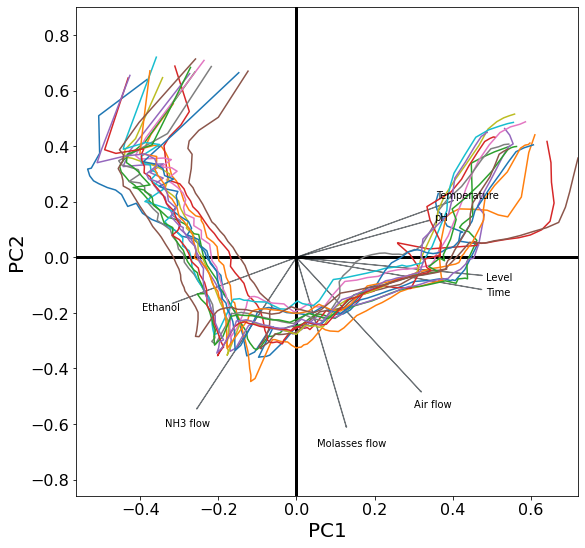

In [ ]:
#score,coeff,loading_labels=None,score_labels=None):
myplot(scores_df, np.transpose(pca.components_[0:2, :]), loading_labels=loadings_df.index, score_labels=df.BatchID)

#def loadings(coeff,loading_labels=None,score_labels=None):  
#loadings(np.transpose(pca.components_[0:2, :]),loading_labels=loadings_df.index,score_labels=scores_df.index)

plt.xlim(loadings_df['PC1'].min() -0.25,loadings_df['PC1'].max()+ 0.25)
plt.ylim(loadings_df['PC2'].min()- 0.25,loadings_df['PC2'].max()+ 0.70)
plt.show()

### 6 Explain this graph. In which quarter do the batches start and end? What happens at the kink where the direction of the lines changes? Can you tell from this graph which variables do not change in the first phase and which in the second phase?

batches start in the top left quadrant and move to the top right. I am assuming this is the case as the time loading is lowest at the top left quadrant and highest at the top right quadrant. 

temperature, ph, level and airflow increase significantly with time 

ethanol concentrations decrease however.



### 7 Plot the cumulative explained variance. How much variance do the first two principal components capture?

In [ ]:
# will run PCA for all 8 and use that  just for more illustration

In [ ]:
pca8 = PCA(n_components=8, svd_solver='full')

In [ ]:
pca8.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

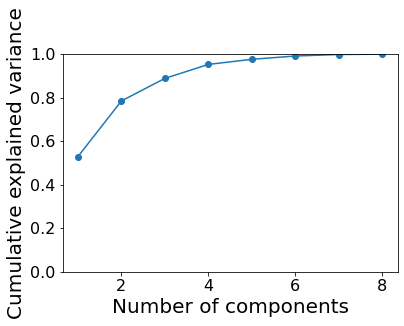

In [ ]:
plt.plot(range(1,pca8.n_components+1), np.cumsum(pca8.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

In [ ]:
print('percent of the variance explained by first 2 PCs', np.cumsum(pca8.explained_variance_ratio_*100)[1])
print('percent of the variance explained by first 3 PCs', np.cumsum(pca8.explained_variance_ratio_*100)[2])

percent of the variance explained by first 2 PCs 78.46737653782884
percent of the variance explained by first 3 PCs 88.84335138834523


The first two PCs only capture about 79% of the variance on the data, thats not as high as I would like and gives the visual analysis using just 2 pcs alittle less weighting.

To figure out where the first two PCs focused their efforts I have plotted their loadings bellow.

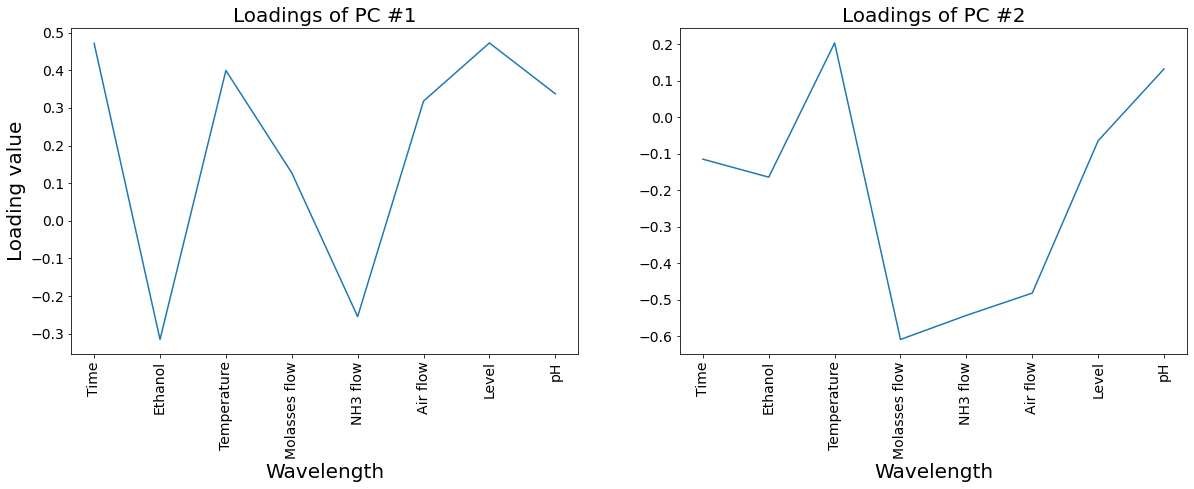

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from matplotlib.ticker import MaxNLocator

fig0 = plt.figure(figsize=(20, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_df['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=20)
sub1.set_ylabel('Loading value', fontsize=20)
sub1.tick_params(axis='x', labelrotation=90)
sub1.set_title('Loadings of PC #1', fontsize=20)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_df['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=20)
sub2.tick_params(axis='x', labelrotation=90)
sub2.set_title('Loadings of PC #2', fontsize=20)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

plt.show()

## 2.2 Use the model to monitor running batches 

The goal of building an unsupervised model is to monitor the running batches. Your site runs two reactors in parallel and here you will fit the data from these two reactors to the model previously built and identify potential problems and outliers (3). 

1. Load the data from the file ’todays batches.xlsx’ and repeat the same procedure as in the steps 3-4 of the previous section with the exception of the PCA modeling. Here, instead of fit the data to the model and transform, you will only transform them with the model object you created in the previous section. 

> (3) Ideally, in most industries you have the data available online and you get a new data point every minute or so. Then you fit every coming point to the model and overlay it with the graph from the previous section. 

2. Plot the same scores-loadings plot for the data in the batches you used to develop the model with solid lines. Overlay the new incoming data from the two current batches with dashed lines and two different colours to distinguish them. Also, add a legend for the two batches so that the viewer can distinguish them. 

3. Do the batches show behaviour similar to that of the reference ones or there are outliers indicating potential problems? 


### 1 Load the data from the file ’todays batches.xlsx’ and repeat the same procedure as in the steps 3-4 of the previous section with the exception of the PCA modeling. Here, instead of fit the data to the model and transform, you will only transform them with the model object you created in the previous section.

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df2=pd.read_excel('todays_batches.xlsx')
df2

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...,...,...,...
161,2734,2735,Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,2735,2736,Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,2736,2737,Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,2737,2738,Za,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


#### (3 From Previous Section) select the features (including the Time column), pre-process the data

In [ ]:
dff2=df2.loc[:,'Time':]
dff2

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...
161,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [ ]:
dff2.describe()

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,6.833334,3.212251,31.075350,1303.736442,68.013791,6517.466928,48.269311,5.199829
std,4.005132,3.111576,1.259588,1058.925713,56.361130,1848.287854,4.182674,0.357212
min,0.000000,0.013860,29.088500,-1.631930,-0.003560,1250.690000,41.921600,4.003240
25%,3.374998,0.633883,29.977625,542.359250,25.197600,6087.305000,44.831900,5.153700
50%,6.833330,1.393080,30.624500,818.595000,61.559800,6783.755000,47.384700,5.169865
75%,10.291650,6.375723,32.541800,2275.497500,97.123300,8263.927500,51.133825,5.195575
max,13.666700,9.581160,33.577900,3296.100000,229.579000,8588.010000,57.228900,6.615460


#### Standardizing the data 

I will standardize as that was done in class although we do not need to as PCA is only effected by the variance 

Normalization:
- Not mean centering as technically only need to normalize (get all std=1) for PCA to yeild unbiased results

In [ ]:
# standardize
scaler = StandardScaler(with_mean=True,with_std=True)
# normalize
# scaler = StandardScaler(with_mean=False,with_std=True)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled2 = scaler.fit_transform(dff2)
#scaled

scaled_df2 = pd.DataFrame(scaled2)
scaled_df2.columns=dff2.columns
scaled_df2.index=dff2.index
scaled_df2.describe()

,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
count,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02
mean,1.163728e-16,-3.531312e-16,-2.929384e-16,-1.511508e-16,2.742117e-16,8.008988e-17,1.048693e-15,9.684355e-16
std,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00
min,-1.711307e+00,-1.031011e+00,-1.582153e+00,-1.236459e+00,-1.210465e+00,-2.858166e+00,-1.522212e+00,-3.359938e+00
25%,-8.660889e-01,-8.311449e-01,-8.741319e-01,-7.211846e-01,-7.619745e-01,-2.334395e-01,-8.243079e-01,-1.295278e-01
50%,-9.353601e-07,-5.864154e-01,-3.590174e-01,-4.595311e-01,-1.148579e-01,1.445088e-01,-2.121340e-01,-8.413758e-02
75%,8.660839e-01,1.019754e+00,1.167752e+00,9.204624e-01,5.180447e-01,9.477663e-01,6.869245e-01,-1.194571e-02
max,1.711315e+00,2.053037e+00,1.992811e+00,1.887188e+00,2.875281e+00,1.123639e+00,2.148553e+00,3.974991e+00


#### Data exploration and visualization Post-Standardization

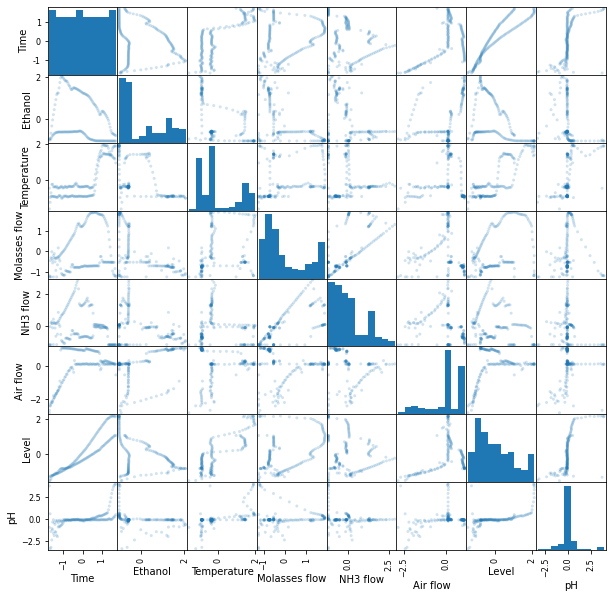

In [ ]:
#from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(scaled_df2, alpha=0.2,figsize=(10,10));

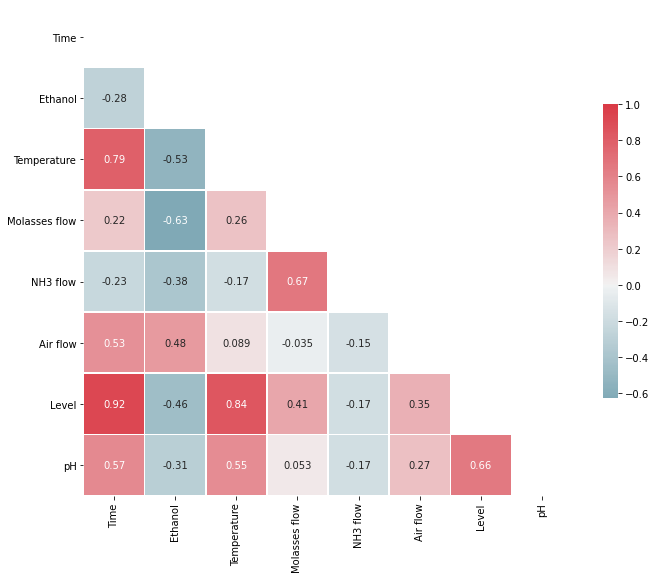

In [ ]:
corr2 = scaled_df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True)
plt.show()

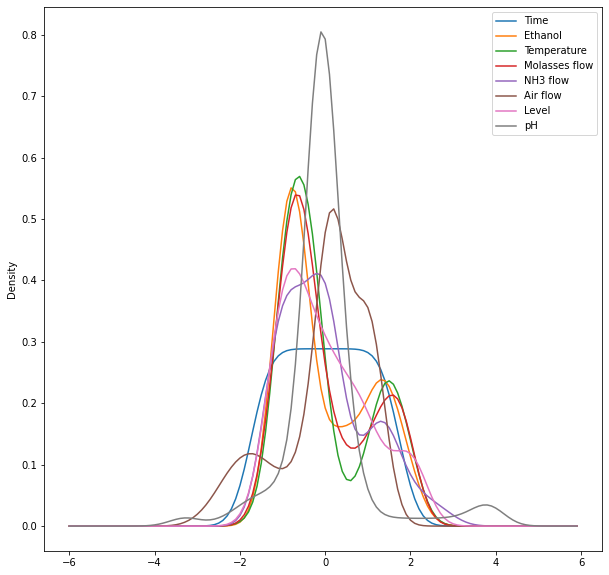

In [ ]:
scaled_df2.plot.kde(ind=np.arange(-6,6,0.1), figsize=(10,10))

SPEAK ABOUT HOW STANDARDIZED IS DIFFERENT

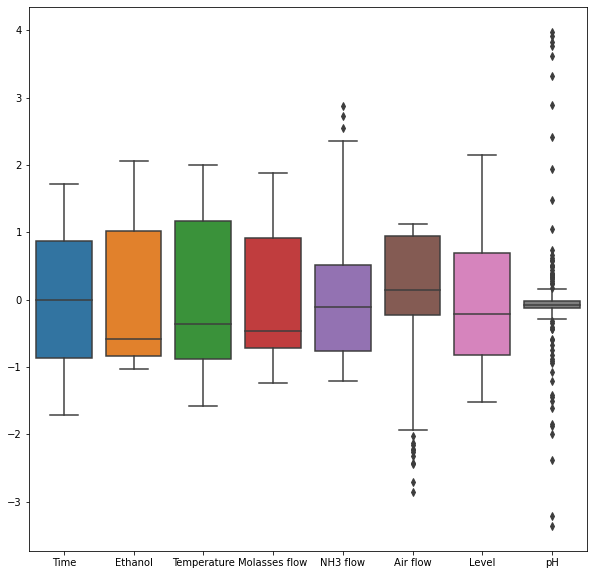

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = scaled_df2)

looks like we havw outliers on pH and Air Flow and NH3 flow those are more extreme then the visually confirmed outliers on ethanol

#### **Running PCA With PCA Object Created from previous section**



In [ ]:
pca

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [ ]:
#pca = PCA(n_components=5, svd_solver='full') # setting up the PCA object
# applying it to th data
pca_scores2 = pca.transform(scaled2)

In [ ]:
# old batch scores (from previous section for comparison)
scores_df.describe()

,PC1,PC2,PC3,PC4,PC5
count,1.328000e+03,1.328000e+03,1.328000e+03,1.328000e+03,1.328000e+03
mean,-5.818639e-17,5.350472e-18,-1.988035e-16,-8.130210e-18,1.584241e-17
std,2.057182e+00,1.431825e+00,9.114294e-01,7.174097e-01,4.340656e-01
min,-3.683228e+00,-2.431569e+00,-3.193672e+00,-2.866672e+00,-1.223455e+00
25%,-1.674986e+00,-1.233378e+00,-7.216883e-01,-4.408532e-01,-3.099451e-01
50%,-5.022732e-01,-3.300800e-01,1.447474e-03,1.060453e-02,-1.335992e-02
75%,1.938399e+00,1.039537e+00,7.510960e-01,4.057358e-01,3.257786e-01
max,4.826890e+00,4.604813e+00,3.571360e+00,2.931640e+00,1.833015e+00


In [ ]:
# convert scores to DF and check them out
scores_df2 = pd.DataFrame(data = pca_scores2
                         ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                         ,index = dff2.index)
scores_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.940228,2.788047,1.543787,1.079616,0.794386
1,-3.455345,2.326521,2.912030,-0.455488,0.646426
2,-3.252958,2.312443,2.655682,-0.707357,0.510623
3,-3.186120,0.775772,2.184541,-0.176226,-0.024210
4,-2.820497,1.141517,1.122811,0.253313,0.025144


In [ ]:
# extract loadings to show the weighting sof the linear combination of features 
# that create each PC


# This stays exactly the same as we did not fit our pca to this data but used the old data!
# This stays exactly the same as we did not fit our pca to this data but used the old data!
# This stays exactly the same as we did not fit our pca to this data but used the old data!
# This stays exactly the same as we did not fit our pca to this data but used the old data!
# This stays exactly the same as we did not fit our pca to this data but used the old data!

loadings_df = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                           ,index = dff.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


#### (4 from previous section) In order to plot the scores-loading plot, you need to pivot the scores BatchID with index ’Time’ (use pandas pivot table).

In [ ]:
scores_df2

,PC1,PC2,PC3,PC4,PC5
0,-2.940228,2.788047,1.543787,1.079616,0.794386
1,-3.455345,2.326521,2.912030,-0.455488,0.646426
2,-3.252958,2.312443,2.655682,-0.707357,0.510623
3,-3.186120,0.775772,2.184541,-0.176226,-0.024210
4,-2.820497,1.141517,1.122811,0.253313,0.025144
...,...,...,...,...,...
161,4.123385,1.810647,-1.529059,0.960293,-0.305053
162,4.265830,1.935516,-1.768853,1.082209,-0.390455
163,4.336795,2.048642,-1.903776,1.164838,-0.440003
164,4.386626,2.048774,-1.985723,1.206895,-0.455038


In [ ]:
dfff2=pd.concat([df2.BatchID,df2.Time,scores_df2],axis=1)
dfff2

,BatchID,Time,PC1,PC2,PC3,PC4,PC5
0,Ya,0.000000,-2.940228,2.788047,1.543787,1.079616,0.794386
1,Ya,0.166667,-3.455345,2.326521,2.912030,-0.455488,0.646426
2,Ya,0.333333,-3.252958,2.312443,2.655682,-0.707357,0.510623
3,Ya,0.500000,-3.186120,0.775772,2.184541,-0.176226,-0.024210
4,Ya,0.666667,-2.820497,1.141517,1.122811,0.253313,0.025144
...,...,...,...,...,...,...,...
161,Za,13.000000,4.123385,1.810647,-1.529059,0.960293,-0.305053
162,Za,13.166700,4.265830,1.935516,-1.768853,1.082209,-0.390455
163,Za,13.333300,4.336795,2.048642,-1.903776,1.164838,-0.440003
164,Za,13.500000,4.386626,2.048774,-1.985723,1.206895,-0.455038


In [ ]:
scores_df2=pd.pivot_table(dfff2,  values=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],index=['BatchID',"Time"])
scores_df2

PC1       PC2       PC3       PC4       PC5
BatchID Time                                                       
Ya      0.000000  -2.940228  2.788047  1.543787  1.079616  0.794386
        0.166667  -3.455345  2.326521  2.912030 -0.455488  0.646426
        0.333333  -3.252958  2.312443  2.655682 -0.707357  0.510623
        0.500000  -3.186120  0.775772  2.184541 -0.176226 -0.024210
        0.666667  -2.820497  1.141517  1.122811  0.253313  0.025144
...                     ...       ...       ...       ...       ...
Za      13.000000  4.123385  1.810647 -1.529059  0.960293 -0.305053
        13.166700  4.265830  1.935516 -1.768853  1.082209 -0.390455
        13.333300  4.336795  2.048642 -1.903776  1.164838 -0.440003
        13.500000  4.386626  2.048774 -1.985723  1.206895 -0.455038
        13.666700  4.437877  2.059891 -2.019775  1.233805 -0.442382

[166 rows x 5 columns]

### 2 Plot the same scores-loadings plot for the data in the batches you used to develop the model with solid lines. Overlay the new incoming data from the two current batches with dashed lines and two different colours to distinguish them. Also, add a legend for the two batches so that the viewer can distinguish them.

#### Plotting Scores & Loadings

In [ ]:
def myplot(scores,coeff,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    
    fig = plt.figure(figsize=(9, 9))
    for batch in scores.index.unique("BatchID"):  
      xt = scores.loc[batch].iloc[:,0]
      yt = scores.loc[batch].iloc[:,1]
      # I guess here we mean center for better visualization 
      scalext = 1.0/(xt.max() - xt.min())
      scaleyt = 1.0/(yt.max() - yt.min())
      xt_scaled = xt * scalext
      yt_scaled = yt * scaleyt
      plt.plot(xt_scaled, yt_scaled, label=batch,alpha=0.5)
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=1)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=1)

    scale=1
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*scale, coeff[i,1]*scale,color = 'r')#), 
        if loading_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*(scale+.1), coeff[i,1]*(scale+.1), loading_labels[i], ha = 'center', va = 'center')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("PC{}".format(1), fontsize=20);
        plt.ylabel("PC{}".format(2), fontsize=20);
        plt.tick_params(labelsize=16)
        plt.grid()

def myplot2(scores):
    # adjusting the scores to fit in (-1,1)

    for batch in scores.index.unique("BatchID"):  
      xt = scores.loc[batch].iloc[:,0]
      yt = scores.loc[batch].iloc[:,1]
      # I guess here we mean center for better visualization 
      scalext = 1.0/(xt.max() - xt.min())
      scaleyt = 1.0/(yt.max() - yt.min())
      xt_scaled = xt * scalext
      yt_scaled = yt * scaleyt
      plt.plot(xt_scaled, yt_scaled, linestyle='dashed', label=batch, alpha=1)
      plt.legend(loc='lower right')

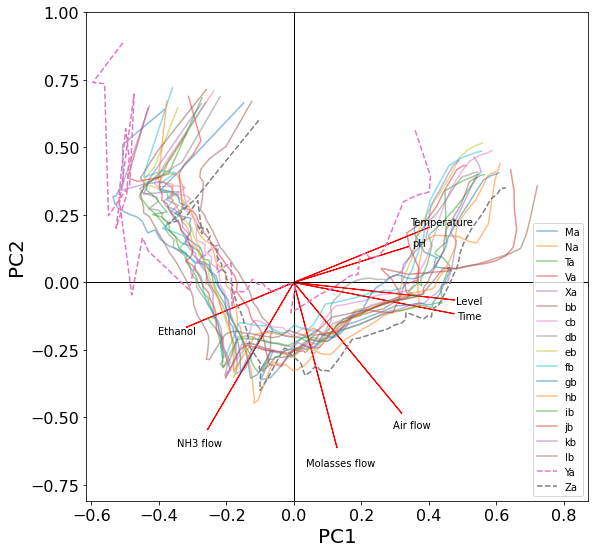

In [ ]:
#score,coeff,loading_labels=None,score_labels=None):
myplot(scores_df, np.transpose(pca.components_[0:2, :]), loading_labels=loadings_df.index, score_labels=df.BatchID)
myplot2(scores_df2)
#def loadings(coeff,loading_labels=None,score_labels=None):  
#loadings(np.transpose(pca.components_[0:2, :]),loading_labels=loadings_df.index,score_labels=scores_df.index)

plt.xlim(loadings_df['PC1'].min() -0.3,loadings_df['PC1'].max()+ 0.4)
plt.ylim(loadings_df['PC2'].min()- 0.2,loadings_df['PC2'].max()+ 0.8)
plt.show()

### 3 Do the batches show behaviour similar to that of the reference ones or there are outliers indicating potential problems?

One of the new batches "Ya" is clearly an outlier that exhibits strange behaviour during the starting time intervals. The batch appear to experience oscilations in its NH3, Molasses Air flow. considering that fact that these are all 3 flow meassurments this could indicate a break in preassure during the process. 

Batch Ya also finishes off with significantly lower Air flow, Molases and level then the pervious batches. 

Batch "Za" exhibits similar behaviour to batch Ya but to a very mild level. At the start is also apreas to brefily oscilate in its NH3, Molasses Air flow but after that it resumes to behave similarly to the previous batches. 
